# Superposition of Waves, Reflection and Refraction

In this notebook, wave phases are discussed, as well as superposition, reflection and refraction.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Phases of waves
```{index} Wavefront
```
```{index} Ray
```

The phase of a wave compared to other waves in superposition or in the group is an important property. Waves for example can have the same function of movement, but can be half a wavelength apart if they are in anti-phase.

It also gives rise to definitions of **wavefront**, which are contours of joining parts of waves that are all in phase. A **ray** is perpendicular to that front and dictates the direction of travel.
<img src="https://www.nist.gov/sites/default/files/images/2022/01/27/phase-difference.gif" alt="image info" width="500" 
     height="500"/>

## Superposition of waves
```{index} Superposition (Waves)
```

When waves get superimposed, their phase needs to be considered. For example, when waves are exactly $180$ degrees or $\pi$ out of phase, destructive interference occurs. If the waves are in phase, constructive interference occurs.

<p style="text-align:center;"><img src="http://waveskms.weebly.com/uploads/2/0/6/9/20699724/9139460_orig.gif" alt="image info" style= "width: 40%"/></p>

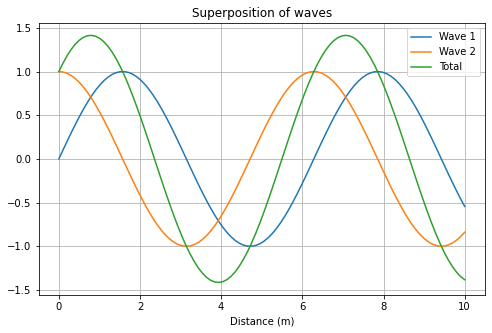

In [61]:
def wave1(y0, k, x):
    return y0 * np.sin(k*x)

def wave2(y0, k, x):
    return y0 * np.sin(k*x + np.pi/2)

x = np.linspace(0, 10, 100)

plt.figure(figsize=(8,5))
plt.xlabel("Distance (m)")
plt.plot(x, wave1(1, 1, x), label = 'Wave 1')
plt.plot(x, wave2(1, 1, x), label = 'Wave 2')
plt.plot(x, wave1(1, 1, x)+wave2(1, 1, x), label = 'Total')
plt.legend()
plt.grid(True)
plt.title("Superposition of waves")
plt.show()

## Reflection, refraction and Snell's law
```{index} Refraction
```
```{index} Snell's law
```
Each point on the wavefront acts as a secondary source of more spherical wavelets.

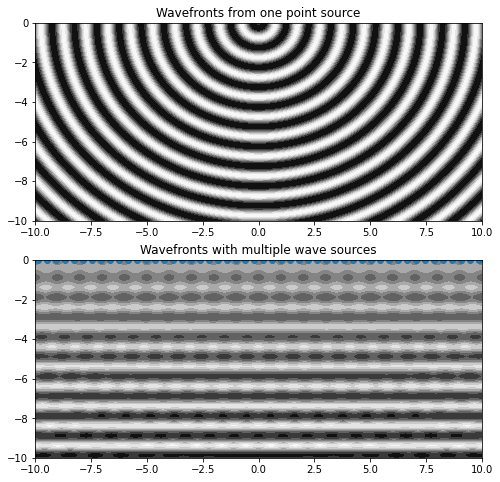

In [62]:
def function(x,y): return np.sin(2*np.pi*np.sqrt(x**2+y**2))

def wavefront(x,y,pnts=100):
    out=0
    for pt in np.linspace(-20,20,pnts):
        out+=f(x-pt,y,2*np.pi*pt*np.sin(0)) # sin(theta) where theta is 0
    return out

x = np.linspace(-10,10,200)
y = np.linspace(-10,0,200)
X_mesh, Y_mesh = np.meshgrid(x,y)

degree=np.pi/180.

fig=plt.figure()
fig.set_size_inches(8, 8)
ax=fig.add_subplot(2,1,1)
bx=fig.add_subplot(2,1,2)
ax.contourf(X_mesh, Y_mesh, function(X_mesh,Y_mesh), cmap="Greys")
ax.set_title("Wavefronts from one point source", size = "12")
bx.contourf(X_mesh, Y_mesh, wavefront(X_mesh,Y_mesh), cmap="Greys")
bx.scatter(np.linspace(-20,20,100)[25:-25],np.linspace(-20,20,100)[25:-25]*0,cmap="Greys")
bx.set_title("Wavefronts with multiple wave sources", size = "12")
plt.show()

For **reflection**, the angle of incidence to the normal is the same as the angle of reflection for a wavefront: $\theta_i = \theta_r$.

**Refraction** is decribed by **Snell's law**. Snell's law is as follows: 

$$\frac{\sin\theta_i}{\sin\theta_r} = \frac{c_1}{c_2} = n $$ 

where $n$ is the ratio of the phase velocity of the two media, also known as the refractive index.

<p style="text-align:center;"><img src="https://galileounbound.files.wordpress.com/2020/01/snellslaw.jpg?w=2400" alt="image info" style= "width: 40%"/></p>


None

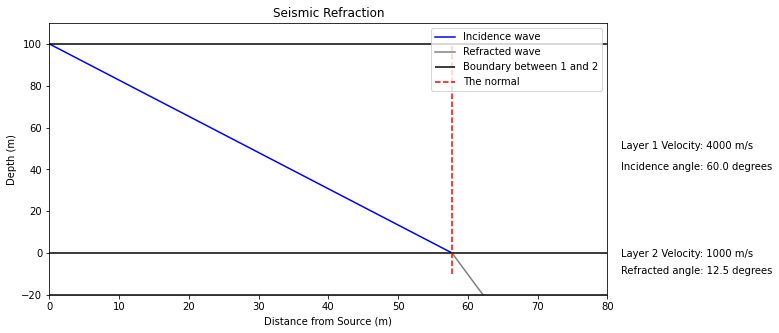

In [143]:
v1 = 4000
v2 = 1000
h = 100 # thickness of layer 1
h2 = 20

fig, ax = plt.subplots(figsize=(10,5))
ax.set_xlabel('Distance from Source (m)')
ax.set_ylabel('Depth (m)')
ax.set_title('Seismic Refraction')

handle = display(None, display_id=True)
bbox = dict(boxstyle ="round", fc = '1')
ax.set_ylim(-h2,h+10)
spacing = 10

# calculate refraction angle, theta_2, from Snell's law
theta_i = np.radians(60)
theta_r = np.arcsin((v2/ v1) * np.sin(theta_i))
theta_s = np.pi/2 - theta_r # angle seen compared to surface instead of normal

# location where incidence wave crosses surface
incidence_wave = (h2-(h+h2))/(-np.tan(incoming_angle)) 

# plot incidence wave from location x=0 to location of intercept of layers
ax.plot(np.linspace(0,incidence_wave),np.linspace(0,incidence_wave)*-np.tan(theta_i)+h,color='blue', label = 'Incidence wave')
# plot refracted wave from location of intercept to 80m
ax.plot(np.linspace(incidence_wave,80),(np.linspace(incidence_wave,80)-incidence_wave)*-np.tan(theta_s),color='grey', label = 'Refracted wave')
ax.hlines(0,0,80,color='black', label = 'Boundary between 1 and 2') # set horizontal waves indicating layer boundaries
ax.hlines(h,0,80,color='black')
ax.hlines(-h2,0,80,color='black')
ax.vlines(incidence_wave,-10, 100, linestyles = 'dashed', colors = 'red', label = 'The normal')
ax.set_xlim(0,80)
ax.text(82,50,'Layer 1 Velocity: '+str(v1)+' m/s')
ax.text(82,40,'Incidence angle: ' + str(round((theta_i*180/np.pi), 2)) +' degrees')
ax.text(82,-2,'Layer 2 Velocity: '+str(v2)+' m/s')
ax.text(82,-10,'Refracted angle: ' + str(round((theta_r*180/np.pi), 2)) +' degrees')
plt.legend()

For critically refraced angle, $\theta_r$ must be $90$ degrees. A critcally refraced ray travels between the two layers with speed $v_2$, and is only created when $v_2 > v_1$.

A head wave forms from the critically refracted ray, since this ray acts as point sources creating semi-circular wavefronts.

In [144]:
v1 = 1000
v2 = 1500
h = 50 # thickness of layer 1
h2 = 10

theta_r = np.radians(90) # critically refraced ray
theta_i = v1/v2
print('For a critically refracted ray, the incidence angle must be', 
      str(round((theta_i*180/np.pi),2)), 'degrees')

For a critically refracted ray, the incidence angle must be 38.2 degrees


None

Text(0.5, 1.0, 'Critically refracted ray')

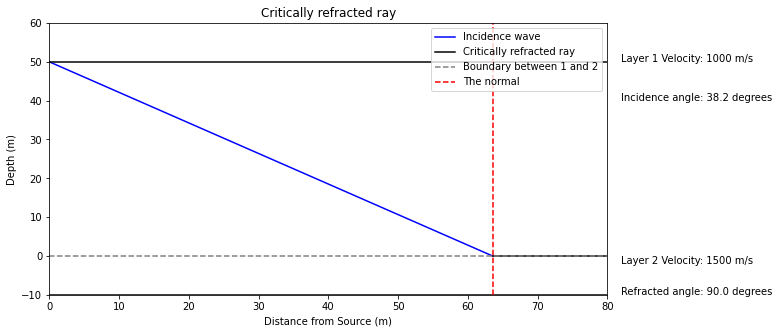

In [145]:
fig, ax = plt.subplots(figsize=(10,5))

handle = display(None, display_id=True)
bbox = dict(boxstyle ="round", fc = '1')
ax.set_ylim(-h2,h+10)
spacing = 10

# calculate refraction angle, theta_2, from Snell's law
theta_s = np.pi/2 - theta_r # angle seen compared to surface instead of normal

# location where incidence wave crosses surface
incidence_wave = (h2-(h+h2))/(-np.tan(theta_i)) 

# plot incidence wave from location x=0 to location of intercept of layers
ax.plot(np.linspace(0,incidence_wave),np.linspace(0,incidence_wave)*-np.tan(theta_i)+h,color='blue', label = 'Incidence wave')
# plot refracted wave from location of intercept to 80m
ax.plot(np.linspace(incidence_wave,80),(np.linspace(incidence_wave,80)-incidence_wave)*-np.tan(theta_s),
        color='black', label = 'Critically refracted ray')


ax.hlines(0,0,80,color='grey', linestyles = 'dashed', label = 'Boundary between 1 and 2') # set horizontal waves indicating layer boundaries
ax.hlines(h,0,80,color='black')
ax.hlines(-h2,0,80,color='black')
ax.vlines(incidence_wave,-10, 60, linestyles = 'dashed', colors = 'red', label = 'The normal')
ax.set_xlim(0,80)
ax.text(82,50,'Layer 1 Velocity: '+str(v1)+' m/s')
ax.text(82,40,'Incidence angle: ' + str(round((theta_i*180/np.pi), 2)) +' degrees')
ax.text(82,-2,'Layer 2 Velocity: '+str(v2)+' m/s')
ax.text(82,-10,'Refracted angle: ' + str(round((90.000), 2)) +' degrees')
plt.legend()
ax.set_xlabel('Distance from Source (m)')
ax.set_ylabel('Depth (m)')
ax.set_title('Critically refracted ray')